# Line_Search_Golden_Section

- Bisection Method: Use $f'$
- Golden Section Method: Use $f$

Zibulevsky [youtube](https://www.youtube.com/watch?v=fhwYiLCihz0)

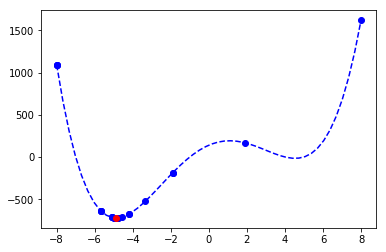

-4.879630969750387


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x+7) * (x+1) * (x-4) * (x-5)

def golden_section(a, d, tol):
    """
    find min point of the original function f without using its derivative f_prime
    
    Input
        a : left end of the interval where min point is 
        d : right end of the interval where min point is
        tol : we stop iteration if (d-a) <= tol
        (f : function of interest)
        # (f_prime : derivative of f, function of interest) NOT USED in golden_section
        
    Output
        sol : center of the interval where min point is
        np.array(history_a) : record of a during bisection iteration 
        np.array(history_d) : record of d during bisection iteration 
    """
   
    tau = (3 - np.sqrt(5))/2
    
    # a and d are the current bounds of the minimum (guaranteed by V-combination)
    # b is the center pointer pushed slightly left towards a
    # c is the center pointer pushed slightly right towards a
    # a < b < c < d
    b = a + tau*(d-a)
    c = d - tau*(d-a)
    history_a = [a]
    history_d = [d]
    
    if (f(a) <= min([f(b),f(c)])) or (f(d) <= min([f(b),f(c)])):
        # if a or d violates V-combination condition, print error message 
        print("Your initial choice of a or d is bad")
    else:
        # if a and d form V-combination, iterate golden section algorithm
    
        while abs(a - d) > tol:
            if f(b) < f(c): 
                # update the interval from [a,d] to [a,c]
                # NOT THIS WAY: d, c, b = c, b, a + tau*(d-a)
                d = c
                c = b
                b = a + tau*(d-a)
            else:           
                # update the interval from [a,d] to [b,d]
                # NOT THIS WAY: a, b, c = b, c, d - tau*(d-a)
                a = b
                b = c
                c = d - tau*(d-a) 
            history_a.append(a)
            history_d.append(d)

        sol = (a + d)/2
        return sol, np.array(history_a), np.array(history_d)

def plot_golden_section(sol, history_a, history_d):
    a = history_a[0]
    d = history_d[0] 
    x = np.linspace(a, d)
    plt.plot(x, f(x), '--b')
    plt.plot(history_a, f(np.array(history_a)), 'ob')
    plt.plot(history_d, f(np.array(history_d)), 'ob')
    plt.plot(sol, f(sol), 'o-r')
    plt.show()

if __name__ == "__main__":
    a = -8.
    d = 8.
    tol = 1e-3
    
    sol, history_a, history_d = golden_section(a, d, tol)
    plot_golden_section(sol, history_a, history_d)
    print(sol)

In [12]:
a = 1.
b = 2.
c = 3.

a, b, c = a/2, b-a, c-a 
print(a, b, c)

0.5 1.0 2.0


In [13]:
a = 1.
b = 2.
c = 3.

a = a/2
b = b-a
c = c-a 
print(a, b, c)

0.5 1.5 2.5
